# Load libraries and import datasets

In [120]:
pip install pandas numpy seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
# Import the pandas library as pd for data manipulation
import pandas as pd

# Import the numpy library as np for numerical operations
import numpy as np

# Import the seaborn library as sns for statistical data visualization
import seaborn as sns

# Import the matplotlib.pyplot module as plt for plotting graphs and visualizations
import matplotlib.pyplot as plt

In [122]:
#Read the CSV files into pandas DataFrames
students_math=pd.read_csv('student-mat.csv',sep=None, engine="python")
students_port=pd.read_csv('student-por.csv', sep=None, engine="python")

print(students_math.head())
print(students_port.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

In [123]:
#Check the structure and summary of the datasets before merging them together
print(students_math.info())
print(students_port.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [124]:
print(students_math.describe())
print(students_port.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

# Note found on readme for data sets:
> _Additional note:_ there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student

In [125]:
#Merge datasets on attribute "invariant" columns to only keep the same students present in both datasets
student_merged=pd.merge(students_math, students_port, how='inner', on=['school', 'sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'])

print(student_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        382 non-null    object
 1   sex           382 non-null    object
 2   age           382 non-null    int64 
 3   address       382 non-null    object
 4   famsize       382 non-null    object
 5   Pstatus       382 non-null    object
 6   Medu          382 non-null    int64 
 7   Fedu          382 non-null    int64 
 8   Mjob          382 non-null    object
 9   Fjob          382 non-null    object
 10  reason        382 non-null    object
 11  guardian_x    382 non-null    object
 12  traveltime_x  382 non-null    int64 
 13  studytime_x   382 non-null    int64 
 14  failures_x    382 non-null    int64 
 15  schoolsup_x   382 non-null    object
 16  famsup_x      382 non-null    object
 17  paid_x        382 non-null    object
 18  activities_x  382 non-null    object
 19  nursery 

In [126]:
student_merged.to_csv('student_merged.csv', index=False)

Range of each numeric variable:
 age              7
Medu             4
Fedu             4
traveltime_x     3
studytime_x      3
failures_x       3
famrel_x         4
freetime_x       4
goout_x          4
Dalc_x           4
Walc_x           4
health_x         4
absences_x      75
G1_x            16
G2_x            19
G3_x            20
traveltime_y     3
studytime_y      3
failures_y       3
famrel_y         4
freetime_y       4
goout_y          4
Dalc_y           4
Walc_y           4
health_y         4
absences_y      32
G1_y            19
G2_y            14
G3_y            19
dtype: int64

Variance of each numeric variable:
 age              1.377032
Medu             1.180223
Fedu             1.201742
traveltime_x     0.483551
studytime_x      0.715374
failures_x       0.532142
famrel_x         0.849384
freetime_x       0.976605
goout_x          1.281259
Dalc_x           0.785402
Walc_x           1.645745
health_x         1.961008
absences_x      58.144453
G1_x            11.216920
G2

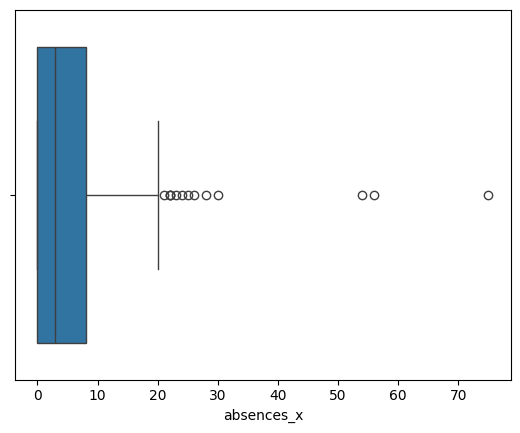

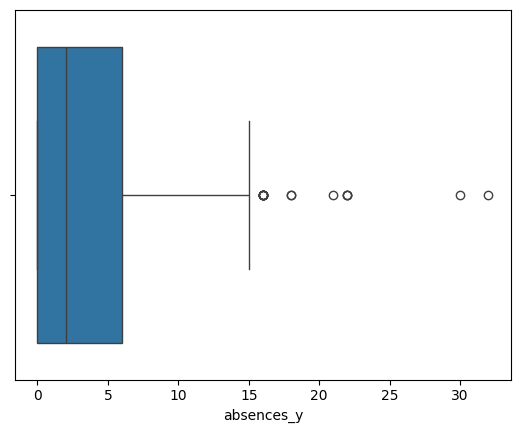

In [127]:
#Find outliers for numeric values
numeric_cols = student_merged.select_dtypes(include=['int64', 'float64']).columns
# Calculate the range (maximum - minimum) for each numeric variable
range_values = student_merged[numeric_cols].max() - student_merged[numeric_cols].min()
print("Range of each numeric variable:\n", range_values)
# Calculate the variance for each numeric variable
variance_values = student_merged[numeric_cols].var()
print("\nVariance of each numeric variable:\n", variance_values)

plt.figure(); sns.boxplot(x=student_merged['absences_x']); plt.show()
plt.figure(); sns.boxplot(x=student_merged['absences_y']); plt.show()

# Cap values of 'absences_x' and 'absences_y' at their 95th percentile to reduce the effect of outliers
cap_value_x = student_merged['absences_x'].quantile(0.95)
cap_value_y = student_merged['absences_y'].quantile(0.95)

student_merged['absences_x'] = student_merged['absences_x'].clip(upper=cap_value_x)
student_merged['absences_y'] = student_merged['absences_y'].clip(upper=cap_value_y)

In [128]:
all_columns = student_merged.columns
# Identify categorical columns by excluding numeric columns
categorical_cols = all_columns.difference(numeric_cols)
print(categorical_cols)
# Apply one-hot encoding
student_merged_encoded = pd.get_dummies(
    student_merged,
    columns=categorical_cols,
    drop_first=True
)
student_merged_encoded = student_merged_encoded.astype(int)
print("Encoded DataFrame shape:")
print(student_merged_encoded.head(2))

print(student_merged_encoded['Fjob_services'].head())

Index(['Fjob', 'Mjob', 'Pstatus', 'activities_x', 'activities_y', 'address',
       'famsize', 'famsup_x', 'famsup_y', 'guardian_x', 'guardian_y',
       'higher_x', 'higher_y', 'internet', 'nursery', 'paid_x', 'paid_y',
       'reason', 'romantic_x', 'romantic_y', 'school', 'schoolsup_x',
       'schoolsup_y', 'sex'],
      dtype='object')
Encoded DataFrame shape:
   age  Medu  Fedu  traveltime_x  studytime_x  failures_x  famrel_x  \
0   18     4     4             2            2           0         4   
1   17     1     1             1            2           0         5   

   freetime_x  goout_x  Dalc_x  ...  paid_y_yes  reason_home  reason_other  \
0           3        4       1  ...           0            0             0   
1           3        3       1  ...           0            0             0   

   reason_reputation  romantic_x_yes  romantic_y_yes  school_MS  \
0                  0               0               0          0   
1                  0               0             

In [129]:
student_merged_encoded.columns.tolist()

['age',
 'Medu',
 'Fedu',
 'traveltime_x',
 'studytime_x',
 'failures_x',
 'famrel_x',
 'freetime_x',
 'goout_x',
 'Dalc_x',
 'Walc_x',
 'health_x',
 'absences_x',
 'G1_x',
 'G2_x',
 'G3_x',
 'traveltime_y',
 'studytime_y',
 'failures_y',
 'famrel_y',
 'freetime_y',
 'goout_y',
 'Dalc_y',
 'Walc_y',
 'health_y',
 'absences_y',
 'G1_y',
 'G2_y',
 'G3_y',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Pstatus_T',
 'activities_x_yes',
 'activities_y_yes',
 'address_U',
 'famsize_LE3',
 'famsup_x_yes',
 'famsup_y_yes',
 'guardian_x_mother',
 'guardian_x_other',
 'guardian_y_mother',
 'guardian_y_other',
 'higher_x_yes',
 'higher_y_yes',
 'internet_yes',
 'nursery_yes',
 'paid_x_yes',
 'paid_y_yes',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'romantic_x_yes',
 'romantic_y_yes',
 'school_MS',
 'schoolsup_x_yes',
 'schoolsup_y_yes',
 'sex_M']

In [130]:
student_merged_encoded.to_csv('student_merged_encoded.csv', index=False)

In [131]:
#Check for inconsistencies in responses from the same students in both datasets

#Check for inconsistencies in 'guardian' (Guardian)
is_guardian_same = (student_merged['guardian_x'] == student_merged['guardian_y']).all()
print(f"Are 'guardian_x' and 'guardian_y' (guardian) identical in all rows?  {is_guardian_same}")

#Check for inconsistencies in 'Dalc' (Alcohol consumption during weekdays)
is_dalc_same = (student_merged['Dalc_x'] == student_merged['Dalc_y']).all()
print(f"Are 'Dalc_x' and 'Dalc_y' (Alcohol consumption during weekdays) identical in all rows?  {is_dalc_same}")

#Count number of rows where 'guardian' and 'Dalc' differ
guardian_diff = (student_merged['guardian_x'] != student_merged['guardian_y']).sum()
dalc_diff = (student_merged['Dalc_x'] != student_merged['Dalc_y']).sum()
print(f"Number of rows where 'guardian' is different: {guardian_diff}")
print(f"Number of rows where 'Dalc' is different: {dalc_diff}")

Are 'guardian_x' and 'guardian_y' (guardian) identical in all rows?  False
Are 'Dalc_x' and 'Dalc_y' (Alcohol consumption during weekdays) identical in all rows?  False
Number of rows where 'guardian' is different: 6
Number of rows where 'Dalc' is different: 5


## Students report different things for each survey, columns cannot be merged. Each columns will be treated separetely

# Identify at _risk students_

In [132]:

# we have 'at_risk_math' and at_risk_port' as our target variables (G3_x and G3_y for final grades in math and portuguese respectively)
#G3 - final grade (numeric: from 0 to 20) if less than 10 - at risk of failing

# Condition: Is student_merged['G3_x'] < 10?
# If True:  set value to 1 (At Risk)
# If False: set value to 0 (Not At Risk)

student_merged['at_risk_math'] = np.where(student_merged['G3_x'] < 10, 1, 0)
student_merged['at_risk_port'] = np.where(student_merged['G3_y'] < 10, 1, 0)

# Combine 'at_risk_total' column for visualization

def set_at_risk_total(row):
    if row['at_risk_math'] == 1 and row['at_risk_port'] == 1:
        return 'At Risk (Both)'
    elif row['at_risk_math'] == 1:
        return 'At Risk (Math Only)'
    elif row['at_risk_port'] == 1:
        return 'At Risk (Port Only)'
    else:
        return 'Not At Risk'

student_merged['at_risk_total'] = student_merged.apply(set_at_risk_total, axis=1)


print("\n--- Target Variable Creation ---")
print("Breakdown of 'at_risk_math':")
print(student_merged['at_risk_math'].value_counts())

print("\nBreakdown of 'at_risk_port':")
print(student_merged['at_risk_port'].value_counts())

print("\nBreakdown of 'at_risk_total':")
print(student_merged['at_risk_total'].value_counts())


--- Target Variable Creation ---
Breakdown of 'at_risk_math':
at_risk_math
0    255
1    127
Name: count, dtype: int64

Breakdown of 'at_risk_port':
at_risk_port
0    350
1     32
Name: count, dtype: int64

Breakdown of 'at_risk_total':
at_risk_total
Not At Risk            246
At Risk (Math Only)    104
At Risk (Both)          23
At Risk (Port Only)      9
Name: count, dtype: int64


# Create cleaned dataset ready for visualization

In [133]:
# Create cleaned dataset ready for visualization
# These are the columns  used to merge. They are the 'invariant' attributes.
invariant_features = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
    'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'
]

# These are the 'variant' attributes related to the Math class (_x)
math_features = [
    'guardian_x', 'traveltime_x', 'studytime_x', 'failures_x', 'schoolsup_x',
    'famsup_x', 'paid_x', 'activities_x', 'higher_x', 'romantic_x', 'famrel_x',
    'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x'
]

# These are the 'variant' attributes related to the Portuguese class (_y)
port_features = [
    'guardian_y', 'traveltime_y', 'studytime_y', 'failures_y', 'schoolsup_y',
    'famsup_y', 'paid_y', 'activities_y', 'higher_y', 'romantic_y', 'famrel_y',
    'freetime_y', 'goout_y', 'Dalc_y', 'Walc_y', 'health_y', 'absences_y'
]

# These are the grade and target columns
target_features = [
    'G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y',
    'at_risk_math', 'at_risk_port', 'at_risk_total'
]

print("\n--- Feature Lists Created ---")
print(f"Invariant Features ({len(invariant_features)})")
print(f"Math-Specific Features ({len(math_features)})")
print(f"Portuguese-Specific Features ({len(port_features)})")


--- Feature Lists Created ---
Invariant Features (13)
Math-Specific Features (17)
Portuguese-Specific Features (17)


In [134]:
# Indices des lignes avec NaN
idx_rows_with_na = student_merged.index[student_merged.isnull().any(axis=1)]

# Lignes contenant au moins un NaN (nombre)
student_merged.isnull().any(axis=1).sum()

np.int64(0)

In [135]:
# 2) Espaces parasites
for c in student_merged.select_dtypes(include='object'):
    if (student_merged[c] != student_merged[c].str.strip()).any():
        print("Needs strip:", c)

In [136]:
student_merged.to_csv('student_merged_cleaned.csv', index=False)

In [137]:
list(student_merged_encoded.columns)   

['age',
 'Medu',
 'Fedu',
 'traveltime_x',
 'studytime_x',
 'failures_x',
 'famrel_x',
 'freetime_x',
 'goout_x',
 'Dalc_x',
 'Walc_x',
 'health_x',
 'absences_x',
 'G1_x',
 'G2_x',
 'G3_x',
 'traveltime_y',
 'studytime_y',
 'failures_y',
 'famrel_y',
 'freetime_y',
 'goout_y',
 'Dalc_y',
 'Walc_y',
 'health_y',
 'absences_y',
 'G1_y',
 'G2_y',
 'G3_y',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Pstatus_T',
 'activities_x_yes',
 'activities_y_yes',
 'address_U',
 'famsize_LE3',
 'famsup_x_yes',
 'famsup_y_yes',
 'guardian_x_mother',
 'guardian_x_other',
 'guardian_y_mother',
 'guardian_y_other',
 'higher_x_yes',
 'higher_y_yes',
 'internet_yes',
 'nursery_yes',
 'paid_x_yes',
 'paid_y_yes',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'romantic_x_yes',
 'romantic_y_yes',
 'school_MS',
 'schoolsup_x_yes',
 'schoolsup_y_yes',
 'sex_M']

## **Random Forest Regressor**

# **Predict both B3_x and B3_y at the same time**

In [138]:
# Multi-output regression to predict G3_x and G3_y simultaneously

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, make_scorer
)

# Use the entire encoded dataframe
df = student_merged_encoded.copy()


exclude = {"G2_x","G3_x","G2_y","G3_y"}

# Select all columns except the excluded ones
use_cols = [c for c in df.columns if c not in exclude]
# Build X (features) and y (two targets) 
# y is a 2D array with two columns: first for G3_x (Math), second for G3_y (Portuguese)
X = df[use_cols].copy()
y = df[["G3_x","G3_y"]].astype(float).values  




In [139]:
# Train/test split (20% test size)
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Define the model 
# RandomForestRegressor natively supports multi-output (multi-target) regression in sklearn.

rf = RandomForestRegressor(
    n_estimators=300,       # number of trees (more trees -> more stable, longer training)
    max_depth=10,          # cap tree depth to control variance
    max_features=None,     # consider all features at each split 
    min_samples_leaf=2,    # avoid tiny leaves that overfit
    min_samples_split=2,   # standard split threshold
    random_state=42,
    n_jobs=-1              # use all CPU cores
)

# Cross-validation scoring
# We create scorers that report:
#  - average scores across both outputs (mae_avg, rmse_avg, r2_avg)
#  - per-target metrics for G3_x and G3_y (to see if one target is harder)

def mae_col(i):
    # MAE for a single target column i
    return make_scorer(lambda yt, yp: mean_absolute_error(yt[:, i], yp[:, i]))

def rmse_col(i):
    # RMSE for a single target column i
    return make_scorer(
        lambda yt, yp: np.sqrt(mean_squared_error(yt[:, i], yp[:, i])),
        greater_is_better=False
    )

def r2_col(i):
    # R^2 for a single target column i
    return make_scorer(lambda yt, yp: r2_score(yt[:, i], yp[:, i]))

# Average scorers across both outputs 
mae_avg = make_scorer(lambda yt, yp: mean_absolute_error(yt, yp))
rmse_avg = make_scorer(lambda yt, yp: np.sqrt(mean_squared_error(yt, yp)), greater_is_better=False)
r2_avg  = make_scorer(lambda yt, yp: r2_score(yt, yp))



cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    # Averages across both targets
    "mae_avg": mae_avg,
    "rmse_avg": rmse_avg,
    "r2_avg":  r2_avg,
    # Per-target metrics
    "mae_G3x": mae_col(0), "rmse_G3x": rmse_col(0), "r2_G3x": r2_col(0),
    "mae_G3y": mae_col(1), "rmse_G3y": rmse_col(1), "r2_G3y": r2_col(1),
}

# cross_validate returns mean ± std across folds; we print the means here for quick inspection
cvres = cross_validate(rf, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_estimator=False)
print({k: float(v.mean()) for k, v in cvres.items() if k.startswith("test_")})



{'test_mae_avg': 1.4572669150081912, 'test_rmse_avg': -2.106051993262507, 'test_r2_avg': 0.6745907118229713, 'test_mae_G3x': 1.7185919493695034, 'test_rmse_G3x': -2.3426833076967393, 'test_r2_G3x': 0.7431192243556656, 'test_mae_G3y': 1.1959418806468782, 'test_rmse_G3y': -1.8346229973332655, 'test_r2_G3y': 0.6060621992902769}


In [140]:
#Fit on the training set and evaluate on the held-out test set ---
rf.fit(X_tr, y_tr)

# Use the trained model to predict BOTH targets on the unseen test split.
y_pred = rf.predict(X_te) 

# We compute metrics separately for each target to see how well the model does on Math (G3_x) vs Portuguese (G3_y).

# MAE (Mean Absolute Error): average absolute difference; 
mae_raw  = np.array([
    mean_absolute_error(y_te[:, 0], y_pred[:, 0]),
    mean_absolute_error(y_te[:, 1], y_pred[:, 1]),
])

#RMSE (Root Mean Squared Error)
# Lower is better.
rmse_raw = np.array([
    np.sqrt(mean_squared_error(y_te[:, 0], y_pred[:, 0])),
    np.sqrt(mean_squared_error(y_te[:, 1], y_pred[:, 1])),
])

# R^2 (coefficient of determination)
# 1.0 = perfect, 0.0 = predicts as well as using the mean, negative = worse than using the mean
r2_raw   = np.array([
    r2_score(y_te[:, 0], y_pred[:, 0]),
    r2_score(y_te[:, 1], y_pred[:, 1]),
])
# Print a concise per-target summary so we can compare subjects side-by-side
print(f"Test — G3_x: MAE {mae_raw[0]:.2f} | RMSE {rmse_raw[0]:.2f} | R2 {r2_raw[0]:.2f}")
print(f"Test — G3_y: MAE {mae_raw[1]:.2f} | RMSE {rmse_raw[1]:.2f} | R2 {r2_raw[1]:.2f}")

# Aggregated averages across both targets
print(
    f"Test (avg):  MAE {mean_absolute_error(y_te, y_pred):.2f} | "
    f"RMSE {np.sqrt(mean_squared_error(y_te, y_pred)):.2f} | "
    f"R2 {r2_score(y_te, y_pred):.2f}"
)


Test — G3_x: MAE 1.66 | RMSE 2.44 | R2 0.73
Test — G3_y: MAE 1.15 | RMSE 1.93 | R2 0.61
Test (avg):  MAE 1.41 | RMSE 2.20 | R2 0.67


# **Plots to understand the model performance**

Top 12 features:
 G1_x            0.515344
G1_y            0.152388
absences_x      0.109276
absences_y      0.035493
failures_x      0.015145
age             0.014587
failures_y      0.011850
reason_home     0.009137
Fjob_teacher    0.007379
Walc_x          0.006947
Medu            0.006793
Walc_y          0.005885
dtype: float64


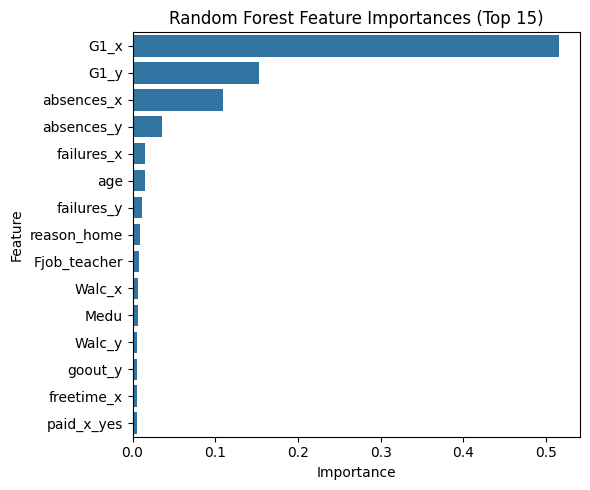

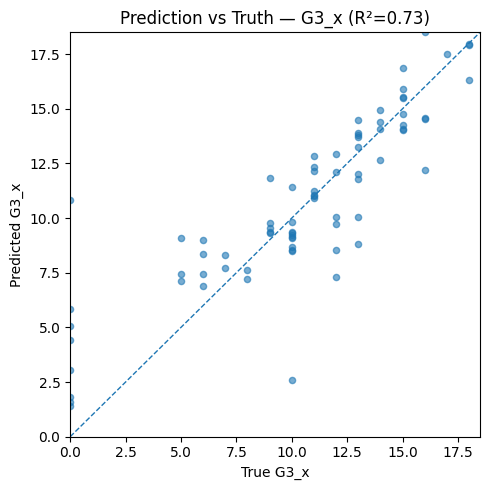

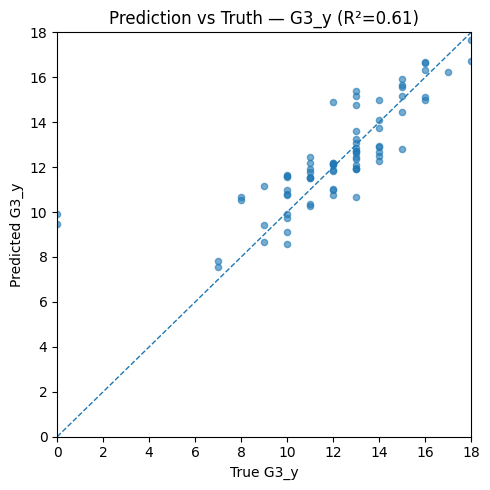

In [148]:
# Feature importance 
# RandomForestRegressor returns one set of importances averaged over outputs.
fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 12 features:\n", fi.head(12))
plt.figure(figsize=(6,5))
sns.barplot(x=fi.values[:15], y=fi.index[:15], orient='h')
plt.title("Random Forest Feature Importances (Top 15)")
plt.xlabel("Importance"); plt.ylabel("Feature")
plt.tight_layout(); plt.show()

# Prediction vs Truth 

targets = [("G3_x", 0), ("G3_y", 1)]
for name, idx in targets:
    plt.figure(figsize=(5, 5))
    # Each point = one student; x = true grade, y = model prediction for that target
    plt.scatter(y_te[:, idx], y_pred[:, idx], alpha=0.6, s=20)

    # 45° reference line (perfect predictions lie on this line)
    lims = [
        min(y_te[:, idx].min(), y_pred[:, idx].min()),
        max(y_te[:, idx].max(), y_pred[:, idx].max())
    ]
    plt.plot(lims, lims, '--', linewidth=1)  # default color (no style specified)
    plt.xlim(lims); plt.ylim(lims)

    # Labels + title with per-target R^2
    plt.xlabel(f"True {name}")
    plt.ylabel(f"Predicted {name}")
    plt.title(f"Prediction vs Truth — {name} (R²={r2_score(y_te[:, idx], y_pred[:, idx]):.2f})")

    plt.tight_layout()
    plt.show()

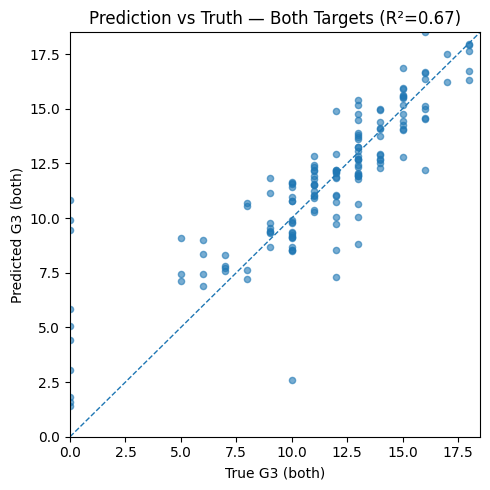

In [149]:
plt.figure(figsize=(5, 5))
plt.scatter(y_te.ravel(), y_pred.ravel(), alpha=0.6, s=20)
lims = [min(y_te.min(), y_pred.min()), max(y_te.max(), y_pred.max())]
plt.plot(lims, lims, '--', linewidth=1)
plt.xlim(lims); plt.ylim(lims)
plt.xlabel("True G3 (both)")
plt.ylabel("Predicted G3 (both)")
from sklearn.metrics import r2_score
plt.title(f"Prediction vs Truth — Both Targets (R²={r2_score(y_te, y_pred):.2f})")
plt.tight_layout()
plt.show()